### Theory Question

**Histogram equalization** is a method in image processing of contrast adjustment using the image’s histogram. It can enhance the global contrast of many images by spreading out the intensity values evenly on the histogram. It can also improve the details of images that are over or under-exposed.

Histogram equalization involves calculating the probability mass function (PMF) and cumulative distribution function (CDF) of the pixel intensities, and then mapping them to new values that result in a uniform distribution.

**Adaptive histogram equalization** (AHE) is a computer image processing technique used to improve contrast in images. It differs from ordinary histogram equalization in the respect that the adaptive method computes several histograms, each corresponding to a distinct section of the image, and uses them to redistribute the lightness values of the image. It is therefore suitable for improving the local contrast and enhancing the definitions of edges in each region of an image.

However, AHE has a tendency to overamplify noise in relatively homogeneous regions of an image. 


A variant of adaptive histogram equalization called contrast limited adaptive histogram equalization (CLAHE) prevents this by limiting the amplification

**Contrast limited adaptive histogram equalization** (CLAHE) is a variant of adaptive histogram equalization (AHE) that prevents overamplification of noise in relatively homogeneous regions of an image. In CLAHE, the contrast amplification in the vicinity of a given pixel value is given by the slope of the transformation function. The slope is limited by a clip limit parameter that can be adjusted by the user.

CLAHE can improve the local contrast and enhance the definitions of edges in each region of an image without producing artifacts or noise amplification. 

AHE has a tendency to overamplify noise in relatively homogeneous regions of an image and CLAHE prevents this by limiting the amplification.

Also campare to ordinary equalization ,AHE and CLAHE compute several histograms, each corresponding to a distinct section


***So the first picture is for CLAHE and the second picture is for AHE***

### Q1

A finite difference is an expression that approximates the change in a function at a point. It can be used to estimate the derivative of a function numerically.

A backward difference uses the function values at x and x − h, where h is the step size. It is given by:

∇f(x<sub>j</sub>) = (f(x<sub>j</sub>) − f(x<sub>j-1</sub>))/(x<sub>j</sub> -x<sub>j-1</sub> )

A forward difference uses the function values at x and x + h. It is given by:

Δf(x<sub>j</sub>) = (f(x<sub>j+1</sub>) − f(x<sub>j</sub>))/(x<sub>j+1</sub> -x<sub>j</sub> )

A central difference uses the function values at x − h and x + h. It is an average of the backward and forward differences. It is given by:

δ(x<sub>j</sub>) = (f(x<sub>j+1</sub>) − f(x<sub>j-1</sub>))/(x<sub>j+1</sub> -x<sub>j-1</sub> )

The central difference has a smaller error than the backward and forward differences, because it is symmetric and cancels out the first-order error terms. The error of the central difference is of order O(h<sup>2</sup>), while the error of the backward and forward differences is of order O(h)

In [ ]:
import numpy as np
from PIL import Image, ImageOps
from numpy import asarray
from matplotlib import pyplot as plt

In [ ]:
def find_derivative(image,mode='backward', dir ='x'):
    ''' 
    image  is input image
    mode set the gradient as backward , forward or central
    dir set if we want f_x or f_y
    '''
    n = image.shape[0]
    d = image - image
    if(mode == 'backward'):
      if(dir == 'x'):
        for i in range(0,n):
          for j in range(0,n):
            if(i==0):
              d[i][j] = image[i][j]
              break
            d[i][j] = int(image[i][j]) - int(image[i-1][j])
      if(dir == 'y'):
        for i in range(0,n):
          for j in range(0,n):
            if(j==0):
              d[i][j] = int(image[i][j])
            d[i][j] = int(image[i][j]) - int(image[i][j-1])
    if(mode == 'forward'):
      if(dir == 'x'):
        for i in range(0,n):
          for j in range(0,n):
            if(i==n-1):
              d[i][j] = image[i][j]
              break
            d[i][j] = int(image[i+1][j]) - int(image[i][j])
      if(dir == 'y'):
        for i in range(0,n):
          for j in range(0,n):
            if(j==n-1):
              d[i][j] = image[i][j]
              break
            d[i][j] = int(image[i][j+1]) - int(image[i][j])
    if(mode == 'central'):
      if(dir == 'x'):
        for i in range(0,n):
          for j in range(0,n):
            if(i==0 or i==n-1):
              d[i][j] = image[i][j]
              break
            d[i][j] = int(image[i+1][j]) - int(image[i-1][j])
      if(dir == 'y'):
        for i in range(0,n):
          for j in range(0,n):
            if(j==n-1):
              d[i][j] = image[i][j]
              break
            d[i][j] = int(image[i][j+1]) - int(image[i][j-1])
    return d


In [ ]:
def scale_array(array, out_range=(0, 255)):
  '''This function normalize an image between range'''
  # Assume array is a numpy array of shape (H, W)
  # Calculate the min and max of the whole array
  min_val = np.min(array)
  max_val = np.max(array)
  # Apply linear transformation
  scaled_array = (array - min_val) / (max_val - min_val) * (out_range[1] - out_range[0]) + out_range[0]
  return scaled_array
def standardImage(img):
  ''' get the absolute values of pixels and then normalize them'''
  img = np.abs(img)
  img = scale_array(img)
  return img

In [ ]:
#convert image to an array anf cinvert type from uint8 to int
image  = asarray(ImageOps.grayscale(Image.open('q1.png'))).astype('int')

In [ ]:
#backward gradient
d1_backward = standardImage(find_derivative(image,mode='backward', dir ='x'))
d2_backward = standardImage(find_derivative(image,mode='backward', dir ='y'))
d1d2_backward = standardImage(np.sqrt(np.power(d1_backward ,2)+np.power(d2_backward ,2)))

In [ ]:
#forward gradient
d1_forward = standardImage(find_derivative(image,mode='forward', dir ='x'))
d2_forward = standardImage(find_derivative(image,mode='forward', dir ='y'))
d1d2_forward = standardImage(np.sqrt(np.power(d1_forward ,2)+np.power(d2_forward ,2)))

In [ ]:
#cetral gradient
d1_central = standardImage(find_derivative(image,mode='central', dir ='x'))
d2_central = standardImage(find_derivative(image,mode='central', dir ='y'))
d1d2_central = standardImage(np.sqrt(np.power(d1_central ,2)+np.power(d2_central ,2)))

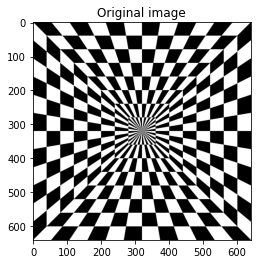

In [ ]:
plt.imshow(image,cmap='gray')
plt.title('Original image')
plt.show()

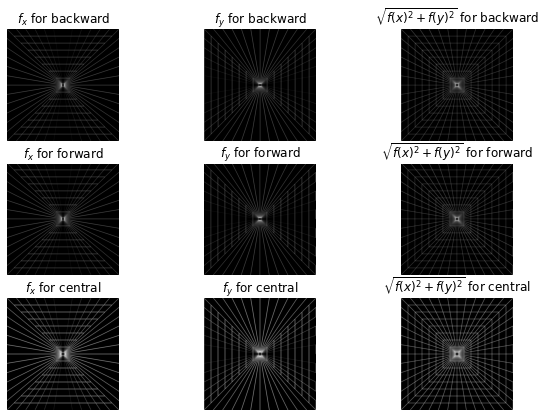

In [ ]:
#Show gradient as 9 images
fig = plt.figure(figsize=(10, 7))
rows = 3
columns = 3
fig.add_subplot(rows, columns, 1)
plt.imshow(d1_backward.astype("uint8"),cmap='gray')
plt.axis('off')
plt.title("$f_x$ for backward")
fig.add_subplot(rows, columns, 2)
plt.imshow(d2_backward.astype("uint8"),cmap='gray')
plt.axis('off')
plt.title("$f_y$ for backward")
fig.add_subplot(rows, columns, 3)
plt.imshow(d1d2_backward.astype("uint8"),cmap='gray')
plt.axis('off')
plt.title("$\sqrt{f(x)^2+f(y)^2}$ for backward")
#################################################
fig.add_subplot(rows, columns, 4)
plt.imshow(d1_forward.astype("uint8"),cmap='gray')
plt.axis('off')
plt.title("$f_x$ for forward")
fig.add_subplot(rows, columns, 5)
plt.imshow(d2_forward.astype("uint8"),cmap='gray')
plt.axis('off')
plt.title("$f_y$ for forward")
fig.add_subplot(rows, columns, 6)
plt.imshow(d1d2_forward.astype("uint8"),cmap='gray')
plt.axis('off')
plt.title("$\sqrt{f(x)^2+f(y)^2}$ for forward")
#################################################
fig.add_subplot(rows, columns, 7)
plt.imshow(d1_central.astype("uint8"),cmap='gray')
plt.axis('off')
plt.title("$f_x$ for central")
fig.add_subplot(rows, columns, 8)
plt.imshow(d2_central.astype("uint8"),cmap='gray')
plt.axis('off')
plt.title("$f_y$ for central")
fig.add_subplot(rows, columns, 9)
plt.imshow(d1d2_central.astype("uint8"),cmap='gray')
plt.axis('off')
plt.title("$\sqrt{f(x)^2+f(y)^2}$ for central")
plt.show()

### Q2

In [ ]:
import numpy as np
from PIL import Image, ImageOps
from numpy import asarray
from matplotlib import pyplot as plt
from scipy import ndimage

In [ ]:
#Compute SNR as the formula in homwork
def snr(image,image_noise):
  x1 = np.sum(np.power(image,2))
  x2 = np.sum(np.power(image-image_noise,2))
  return 10*np.log10(x1/x2)

In [ ]:
#Load original image and noisy image
image = asarray(ImageOps.grayscale(Image.open('city_orig.jpg')))
image_noise  = asarray(ImageOps.grayscale(Image.open('city_noise.jpg')))

In [ ]:
#convert type of images to int
image = image.astype('int')
image_noise = image_noise.astype('int')

In [ ]:
#split images to 4 part
M = image.shape[0]//2 -1
N = image.shape[1]//2 +1
image1 = image[0:M,0:N]
image2 = image[M:image.shape[0],0:N]
image3 = image[0:M,N:image.shape[1]]
image4 = image[M:image.shape[0],N:image.shape[1]]
image1_noise = image_noise[0:M,0:N]
image2_noise = image_noise[M:image.shape[0],0:N]
image3_noise = image_noise[0:M,N:image.shape[1]]
image4_noise  = image_noise[M:image.shape[0],N:image.shape[1]]

In [ ]:
#Find SNR of each noisy part
snr_salt = snr(image1 , image1_noise)
snr_gaussian_salt =  snr(image2 , image2_noise)
snr_without_noise =  snr(image3 , image3_noise)
snr_gaussian =  snr(image4 , image4_noise)

<ipython-input-11-659802b762a7>:5: RuntimeWarning: divide by zero encountered in long_scalars
  return 10*np.log10(x1/x2)


In [ ]:
print("SNR of with salt and pepper noise = ",snr_salt)
print("SNR of with gaussian noise = ", snr_gaussian)
print("SNR of with salt and paper and gaussian noise = ",snr_gaussian_salt)
print("SNR of without noise =  ",snr_without_noise)

SNR of with salt and pepper noise =  12.017100563778493
SNR of with gaussian noise =  4.13827190823983
SNR of with salt and paper and gaussian noise =  3.285812696635826
SNR of without noise =   inf


In [ ]:
def mean_filter(img):
      '''In this function we find the average of 9 pixels those are in 3*3 square '''
      m, n = img.shape
      mask = np.ones((3, 3), dtype = int)/9
      img_new = img - img
        
      for i in range(1, m-1):
          for j in range(1, n-1):
            temp = 0
            for k in range(3):
              for u in range(3):
                temp += img[i-1+k, j-1+u]*mask[0+k, 0+u]
            img_new[i, j]= temp
                
      img_new = img_new.astype(np.uint8)
      return img_new

In [ ]:
def median_filter(img):
      '''In this function we find the median of 9 pixels those are in 3*3 square '''
      m, n = img.shape
        
      img_new = img - img
        
      for i in range(1, m-1):
          for j in range(1, n-1):
              temp = sorted([img[i-1, j-1],
                    img[i-1, j],
                    img[i-1, j + 1],
                    img[i, j-1],
                    img[i, j],
                    img[i, j + 1],
                    img[i + 1, j-1],
                    img[i + 1, j],
                    img[i + 1, j + 1]])
                
              img_new[i, j]= temp[4]
        
      img_new = img_new.astype(np.uint8)
      return img_new

In [ ]:
def gaussian_kernel(size, sigma):
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g / g.sum()
def convolution(image, kernel):
    # Get the shape of the image and the kernel
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    # Define the output array
    output = np.zeros_like(image)

    # Pad the image with zeros to handle the edges
    pad_height = kernel_row // 2
    pad_width = kernel_col // 2
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

    # Loop over every pixel of the image
    for row in range(image_row):
        for col in range(image_col):
            # Multiply the kernel with the image pixels and sum the result
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
    
    return output
def gaussian_filter(img):
  kernel = gaussian_kernel(5, 1)
  filtered_img = np.zeros_like(img)
  filtered_img = convolution(img, kernel)
  return filtered_img.astype(np.uint8)
  

In [ ]:
# Test filters on image with salt and pepper noise
image1_gauss_filter = ndimage.gaussian_filter(image1_noise, sigma=1)
image1_mean_filter = mean_filter(image1_noise)
image1_median_filter =  ndimage.median_filter(image1_noise, size=3)

In [ ]:
# Find SNR after filtering for image with salt and pepper noise
snr_salt_gauss_filter = snr(image1 , image1_gauss_filter)
snr_salt_mean_filter = snr(image1 , image1_mean_filter)
snr_salt_median_filter = snr(image1 , image1_median_filter)

In [ ]:
# Test filters on image with salt and pepper and gaussian noises
image2_gauss_filter = ndimage.gaussian_filter(image2_noise, sigma=1)
image2_mean_filter = mean_filter(image2_noise)
image2_median_filter =  ndimage.median_filter(image2_noise, size=3)

In [ ]:
# Find SNR after filtering for image with salt and pepper and gaussian noises
snr_gaussian_salt_gauss_filter = snr(image2 , image2_gauss_filter)
snr_gaussian_salt_mean_filter = snr(image2 , image2_mean_filter)
snr_gaussian_salt_median_filter = snr(image2 , image2_median_filter)

In [ ]:
# Test filters on image with gaussian noise
image4_gauss_filter = ndimage.gaussian_filter(image4_noise, sigma=2)
image4_mean_filter = mean_filter(image4_noise)
image4_median_filter =  ndimage.median_filter(image4_noise, size=3)

In [ ]:
# Test filters on image with gaussian noise
snr_gaussian_gauss_filter = snr(image4 , image4_gauss_filter)
snr_gaussian_mean_filter = snr(image4 , image4_mean_filter)
snr_gaussian_median_filter = snr(image4 , image4_median_filter)

In [ ]:
#Show SNR in a tabel
from tabulate import tabulate
data = [['image salt and pepper noise', snr_salt, snr_salt_gauss_filter, snr_salt_mean_filter,snr_salt_median_filter,'Median'],
['image gaussian noise and salt and pepper noise', snr_gaussian_salt, snr_gaussian_salt_gauss_filter, snr_gaussian_salt_mean_filter,snr_gaussian_salt_median_filter,'Median'],
['image gaussian noise', snr_gaussian, snr_gaussian_gauss_filter, snr_gaussian_mean_filter,snr_gaussian_median_filter,'Gaussian']]
print (tabulate(data, headers=["name ", "SNR of noisy image", "SNR after gauss filter ", "SNR after mean filter ","SNR after median filter ","Visual"]))

name                                              SNR of noisy image    SNR after gauss filter     SNR after mean filter     SNR after median filter   Visual
----------------------------------------------  --------------------  -------------------------  ------------------------  --------------------------  --------
image salt and pepper noise                                 12.0171                     20.1354                   16.2329                    24.1498   Median
image gaussian noise and salt and pepper noise               3.28581                    11.7457                   10.1364                     9.30697  Median
image gaussian noise                                         4.13827                    13.8244                   11.0678                    10.0601   Gaussian


Text(0.5, 1.0, 'median filter')

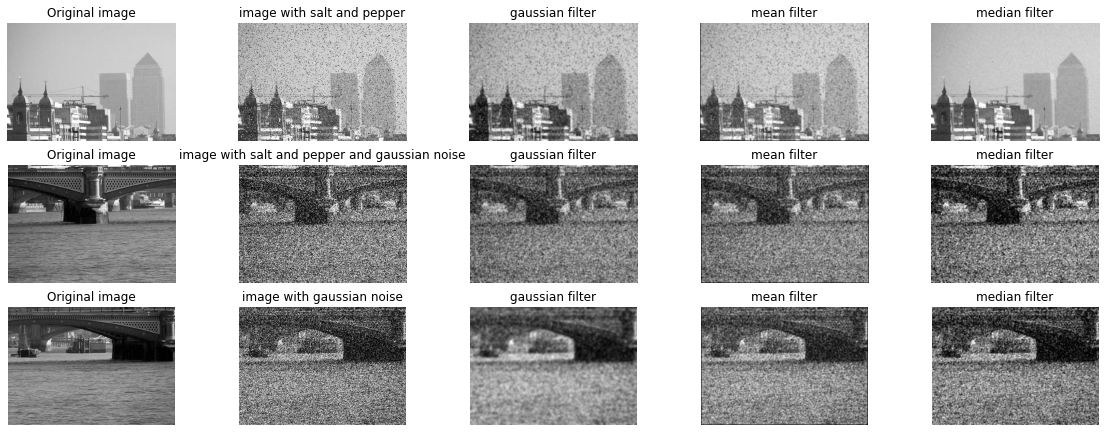

In [ ]:
fig = plt.figure(figsize=(20, 10))
rows = 4
columns = 5
fig.add_subplot(rows, columns, 6)
plt.imshow(image1,cmap='gray')
plt.axis('off')
plt.title("Original image")
fig.add_subplot(rows, columns, 7)
plt.imshow(image1_noise,cmap='gray')
plt.axis('off')
plt.title("image with salt and pepper")
fig.add_subplot(rows, columns, 8)
plt.imshow(image1_gauss_filter,cmap='gray')
plt.axis('off')
plt.title("gaussian filter")
fig.add_subplot(rows, columns, 9)
plt.imshow(image1_mean_filter,cmap='gray')
plt.axis('off')
plt.title("mean filter")
fig.add_subplot(rows, columns, 10)
plt.imshow(image1_median_filter,cmap='gray')
plt.axis('off')
plt.title("median filter")
#################################################
fig.add_subplot(rows, columns, 11)
plt.imshow(image2,cmap='gray')
plt.axis('off')
plt.title("Original image")
fig.add_subplot(rows, columns, 12)
plt.imshow(image2_noise,cmap='gray')
plt.axis('off')
plt.title("image with salt and pepper and gaussian noise")
fig.add_subplot(rows, columns, 13)
plt.imshow(image2_gauss_filter,cmap='gray')
plt.axis('off')
plt.title("gaussian filter")
fig.add_subplot(rows, columns, 14)
plt.imshow(image2_mean_filter,cmap='gray')
plt.axis('off')
plt.title("mean filter")
fig.add_subplot(rows, columns, 15)
plt.imshow(image2_median_filter,cmap='gray')
plt.axis('off')
plt.title("median filter")
#################################################
fig.add_subplot(rows, columns, 16)
plt.imshow(image4,cmap='gray')
plt.axis('off')
plt.title("Original image")
fig.add_subplot(rows, columns, 17)
plt.imshow(image4_noise,cmap='gray')
plt.axis('off')
plt.title("image with gaussian noise")
fig.add_subplot(rows, columns, 18)
plt.imshow(image4_gauss_filter,cmap='gray')
plt.axis('off')
plt.title("gaussian filter")
fig.add_subplot(rows, columns, 19)
plt.imshow(image4_mean_filter,cmap='gray')
plt.axis('off')
plt.title("mean filter")
fig.add_subplot(rows, columns, 20)
plt.imshow(image4_median_filter,cmap='gray')
plt.axis('off')
plt.title("median filter")

***Salt and pepper noise*** is a type of noise that affects only a few pixels in an image, but makes them very bright or very dark. This can degrade the quality and contrast of the image1.

To remove salt and pepper noise, different filters can be used, such as mean, median and Gaussian filters. However, they have different advantages and disadvantages.

Mean filter: This filter replaces each pixel with the average of its neighboring pixels. This can smooth out the noise, but also blur the edges and details of the image2.
Median filter: This filter replaces each pixel with the median of its neighboring pixels. This can preserve the edges and details better than the mean filter, but also introduce some artifacts and distortions2.


Gaussian filter: This filter replaces each pixel with a weighted average of its neighboring pixels, where the weights are determined by a Gaussian function. This can reduce the noise and preserve the edges and details better than the mean filter, but also blur the image more than the median filter3.


**According to a comparative analysis of different filters for salt and pepper noise removal in images, the median filter performs better than the mean and Gaussian filters.**

**based on SNR values, Median filter has performed better.**

***Gaussian noise*** is a type of noise that affects all the pixels in an image, but makes them slightly brighter or darker. This can reduce the sharpness and contrast of the image1.

To remove Gaussian noise, different filters can be used, such as mean, median and Gaussian filters. However, they have different advantages and disadvantages.


According to a comparative analysis of different filters for Gaussian noise removal, the best filter depends on the level of noise and the number of iterations of the filter. Sometimes the Gaussian filter is better and sometimes the median filter is better. The denoising autoencoder, which is a deep learning model, can also handle Gaussian noise well, but it takes more time than the other filters3. When considering only the time parameter, the median filter gives better results in less time than the Gaussian filter and the denoising autoencoder3.

**But based on SNR values, Gaussian filter has performed better.**

**For the mixed noise, it seems that the Gaussian filter causes less blurring and Gaussian filter result has less noise, at the same time, according to the SNR values, the Gaussian filter has performed better.**

### Q3

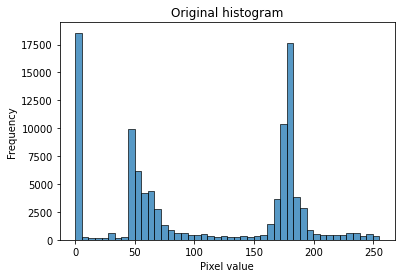

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

gray = cv2.cvtColor(cv2.imread('q3_1.JPG'), cv2.COLOR_BGR2GRAY)

# Plot the histogram using sns.histplot
sns.histplot(gray.flatten(), kde=False)
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.title('Original histogram')
# Save the figure as a PNG file
plt.savefig('q3res1.jpg')

Normalization of an image is a process that changes the range of pixel intensity values to improve the contrast and visibility of the image. One way to normalize an image is to use histogram equalization, which is a technique that redistributes the pixel values so that the histogram of the image is more uniform. This can enhance the fine details and features of the image that may be hidden in the dark or bright regions.

To perform histogram equalization, we need to calculate the cumulative distribution function (CDF) of the pixel values, which is the sum of the probabilities of all the pixel values up to a given value. Then, we map each pixel value to a new value based on the CDF, such that the new values are evenly distributed in the range of 0 to (L-1), where L is the number of possible intensity levels. This can be done using the following formula:

$s_k = (L-1) \times sum(p_rj) \;for \;j = 0\; to\; k$

where $s_k$ is the new pixel value, $p_{rj}$ is the probability of the pixel value $r_j$, and $k$ is the original pixel value

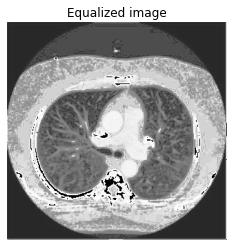

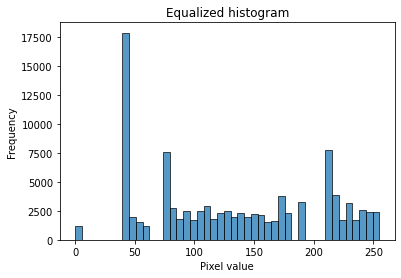

In [ ]:
# Get the number of pixels and intensity levels
N = gray.size

L = 260
hist = np.bincount(gray.flatten(), minlength=L)
p = hist / N
# Calculate CDF
cdf = np.cumsum(p)

# Map each pixel value to a new value based on the CDF
s = (L-1) * cdf
eq = s[gray].astype(np.uint8)


plt.imshow(eq, cmap='gray')
plt.title('Equalized image')
plt.savefig('q3res2.jpg')
plt.axis('off')
plt.show()

sns.histplot(eq.flatten(), kde=False)
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.title('Equalized histogram')
plt.savefig('q3res3.jpg')
plt.show()


In [ ]:
input_img = cv2.imread('q3_2.jpg')
ref = cv2.imread('q3_3.jpg')

In [ ]:
input_img.shape

(1656, 2208, 3)

In [ ]:
import numpy as np

def hist_match(source, template):
    # Get the unique values and their corresponding counts for the source and template images
    s_values, s_counts = np.unique(source, return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)

    # Compute the cumulative distribution functions for the source and template images
    s_cdf = np.cumsum(s_counts).astype(np.float64)
    s_cdf /= s_cdf[-1]
    t_cdf = np.cumsum(t_counts).astype(np.float64)
    t_cdf /= t_cdf[-1]

    # Interpolate linearly to find the pixel values in the template image
    # that correspond most closely to the quantiles in the source image

    interp_t_values = np.interp(s_cdf, t_cdf, t_values)
    if interp_t_values.shape[0] <= source.max():
      interp_t_values = np.resize(interp_t_values, source.max() + 1)
    # Map the source image pixels to the interpolated values
    matched = interp_t_values[source]

    return matched

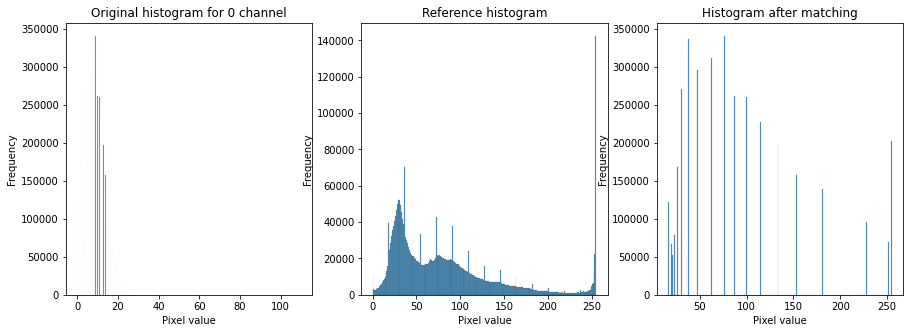

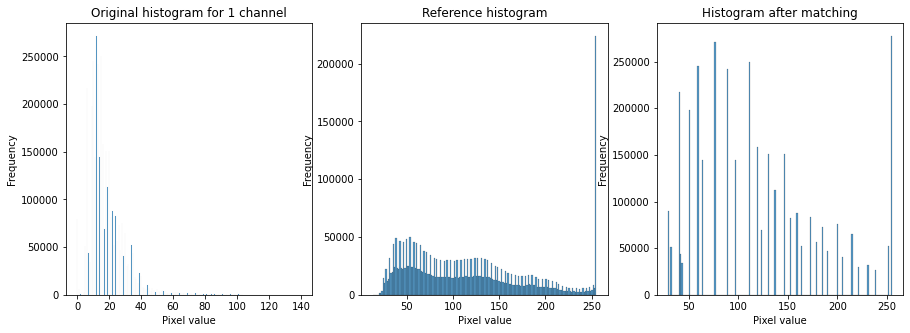

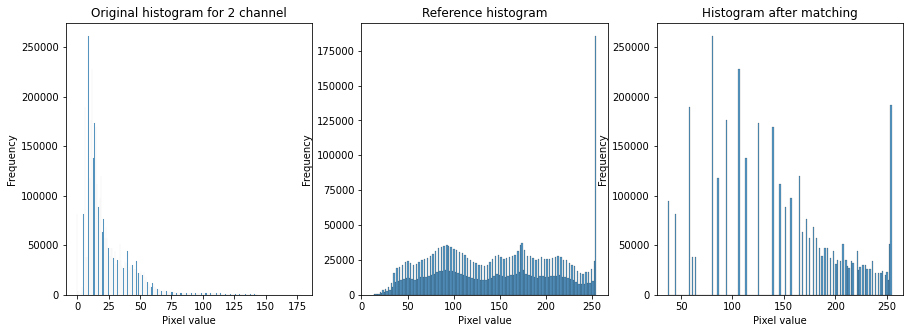

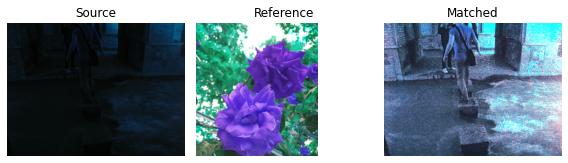

In [ ]:
# Perform histogram matching
matched = input_img - input_img
for i in range(3):
    source = input_img[:,:,i]
    template = ref[:,:,i]
    # Perform histogram matching
    out = hist_match(source, template)
    matched[:,:,i] = out
    fig = plt.figure(figsize=(15, 5))
    rows = 1
    columns = 3
    fig.add_subplot(rows, columns, 1)
    sns.histplot(source.flatten(), kde=False)
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')
    plt.title('Original histogram'+' for '+str(i)+' channel')
    fig.add_subplot(rows, columns, 2)
    sns.histplot(template.flatten(), kde=False)
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')
    plt.title('Reference histogram')
    fig.add_subplot(rows, columns, 3)
    sns.histplot(out.flatten(), kde=False)
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')
    plt.title('Histogram after matching')
    plt.savefig('q3-3_'+'histogram-for'+'channel'+str(i+1)+'.jpg')
    plt.show()


# Convert the matched image back to uint8
matched = matched.astype(np.uint8)
from PIL import Image
im = Image.fromarray(matched)
im.save("q3-3_result.jpg")
# Display the results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(input_img)
ax1.set_title('Source')
ax1.axis('off')
ax2.imshow(ref)
ax2.set_title('Reference')
ax2.axis('off')
ax3.imshow(matched)
ax3.set_title('Matched')
ax3.axis('off')
plt.tight_layout()
plt.show()

### Q4


In [3]:
#Import Libraris
import os
import sys 
import cv2 as cv
import numpy as np
import plotly.io as pio
import plotly.graph_objs as go
from PIL import Image
from skimage import color
from plotly import subplots
import matplotlib.pyplot as plt


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
#Loading data 
IMG_DIR = '/content/drive/MyDrive/brain_data'
X = []
X_flat = []

size = 96


for img in os.listdir(IMG_DIR):

    img_array = cv.imread(os.path.join(IMG_DIR, img), cv.IMREAD_GRAYSCALE)
    img_64 = np.array(Image.fromarray(img_array).resize((size, size), Image.ANTIALIAS))
    img_64 = img_64.flatten()
    X_flat.append(img_64)
X_flat = np.asarray(X_flat)
X_flat = X_flat.T
X_flat = X_flat.astype('int')


In [63]:
#make sure that the shape of data is correct
X_flat.shape

(9216, 15)

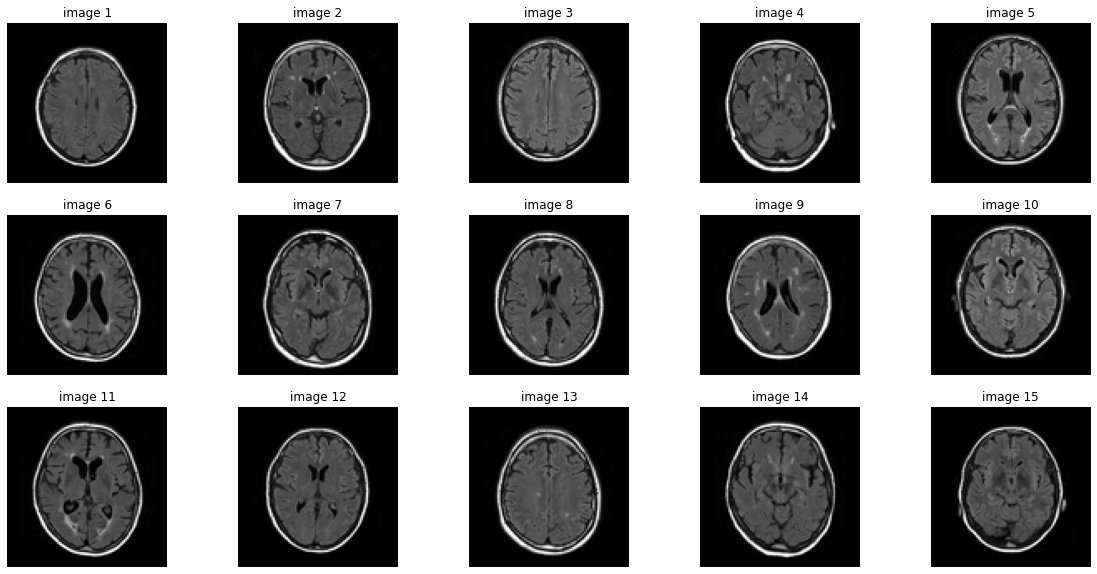

In [83]:
#ploting original images
fig = plt.figure(figsize=(20, 10))
rows = 3
columns = 5
for i in range(15):
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(X_flat[:,i].reshape((96,96)).astype("uint8"),cmap = 'gray')
  plt.axis('off')
  plt.title("image "+str(i+1))
plt.show()

In [64]:
X_flat = X_flat.astype('float')

#### method 1

In [76]:
# Define a function for PCA and reconstruction
def my_pca_recon(X):
  # returns transformed X, reconstructed X, variance explained
  mean = np.mean(X, axis=0) # compute column mean 
  Z = X - mean # center the data 
  cov = np.dot(Z.T, Z) / (X.shape[0] - 1) # compute covariance matrix 
  evals, evecs = np.linalg.eig(cov) # compute eigenvalues and eigenvectors 
  idx = np.argsort(evals)[::-1] # sort eigenvalues in descending order 
  evecs = evecs[:,idx] # sort eigenvectors accordingly 
  evals = evals[idx] # sort eigenvalues accordingly 
  # We use cumsum to find the best number of components
  variance_retained=np.cumsum(evals)/np.sum(evals)
  n_components = np.argmax(variance_retained>=0.99)+1

  X_pca = np.dot(Z, evecs[:,0:n_components]) # project data onto first n_components eigenvectors 

  X_recon = np.dot(X_pca.reshape(-1,n_components), evecs[:,0:n_components].T) + mean # inverse transform using first n_components eigenvectors 

  


  return X_recon,n_components 

In [77]:
X_recon,n_components  = my_pca_recon (X_flat)

In [80]:
print("Number of eigen vectors is = ",n_components )

Number of eigen vectors is =  14


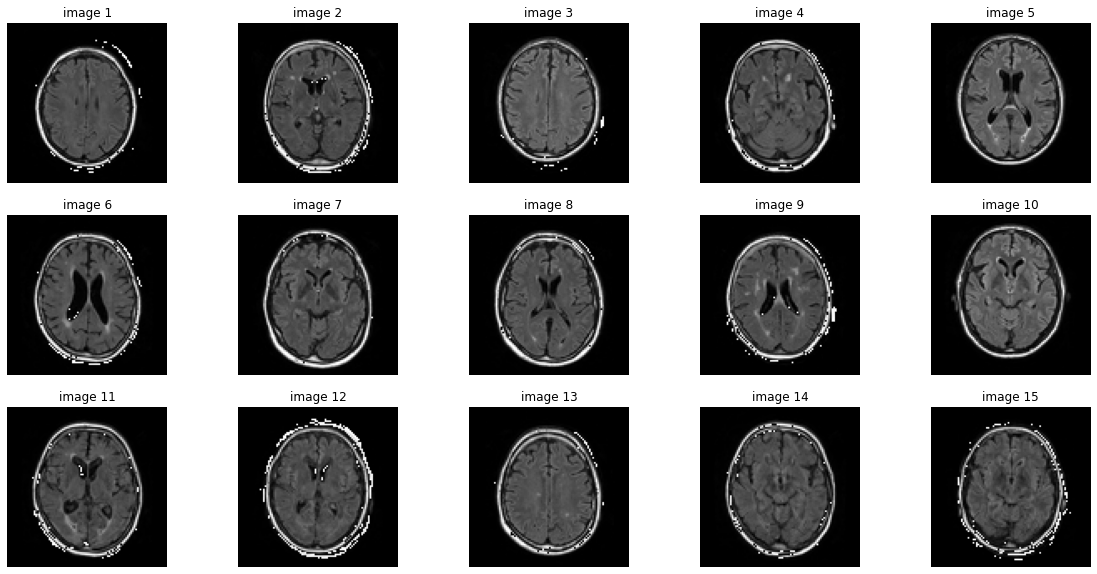

In [82]:
#ploting recunstructed images
fig = plt.figure(figsize=(20, 10))
rows = 3
columns = 5
for i in range(15):
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(X_recon[:,i].reshape((96,96)).astype("uint8"),cmap = 'gray')
  plt.axis('off')
  plt.title("image "+str(i+1))
plt.show()

#### method 2

In [ ]:
#Standardizing data
mean = np.mean(X_flat)
std = np.std(X_flat)
standardized_X = ((X_flat - mean) / std)


In [ ]:
standardized_X.shape

(9216, 15)

In [ ]:
#Find covariance
C = np.cov(standardized_X)
#Find eigen values and eighen vectors
eig_val, eig_vec = np.linalg.eigh(C) 
#ُSort based on eigen values 
sorted_eig  = np.argsort(-eig_val)
eig_val = eig_val[sorted_eig]
eig_vec = eig_vec[:, sorted_eig]

Now we want to find the best number of components

In [ ]:
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eig_val = np.cumsum(eig_val)/np.sum(eig_val)


We plot cumsum of eigen values and peak eigen vectors until this sum become 1

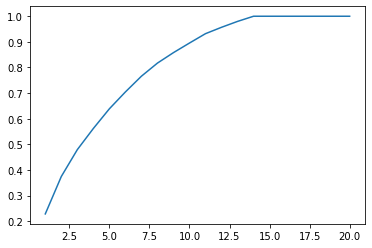

In [ ]:
plt.plot(list(range(1, len(cum_sum_eig_val))[:20]), cum_sum_eig_val[:20]) 
plt.show() 

So we choose 14 as number of components

In [ ]:
#calculating loss and reconstructing images
loss = []
reconstructions = []
max_components = 20

print("Processing...")
for num_component in range(1, max_components + 1):
    print("num_component = ",num_component," of ",max_components)
    A = eig_vec[:, range(num_component)]
    P = A @ A.T 
    #Find reconsruction
    reconst = standardized_X.T @ P
    #Find Error of reconsruction
    error = np.sqrt(np.square(reconst - standardized_X.T).sum(axis = 1)).mean()
    reconstructions.append(reconst)
    loss.append((num_component, error))
print()
print("Done!")

Processing...
num_component =  1  of  20
num_component =  2  of  20
num_component =  3  of  20
num_component =  4  of  20
num_component =  5  of  20
num_component =  6  of  20
num_component =  7  of  20
num_component =  8  of  20
num_component =  9  of  20
num_component =  10  of  20
num_component =  11  of  20
num_component =  12  of  20
num_component =  13  of  20
num_component =  14  of  20
num_component =  15  of  20
num_component =  16  of  20
num_component =  17  of  20
num_component =  18  of  20
num_component =  19  of  20
num_component =  20  of  20

Done!


In [ ]:
#visualizing mse vs number of principal components
loss = np.array(loss)
trace = go.Scatter(x = loss[:, 0], y = loss[:, 1])
data = [trace]
fig = go.Figure(data)
fig.update_layout(title = "MSE vs number of principal components", 
                  xaxis_title = "Number of principal components", 
                  yaxis_title = "MSE", template = "plotly_dark")
fig.show()

We peak 12 as number of eigen vectors

In [ ]:
A = eig_vec[:, range(14)]
P = A @ A.T 
reconst = standardized_X.T @ P
reconst2 = reconst*std + mean

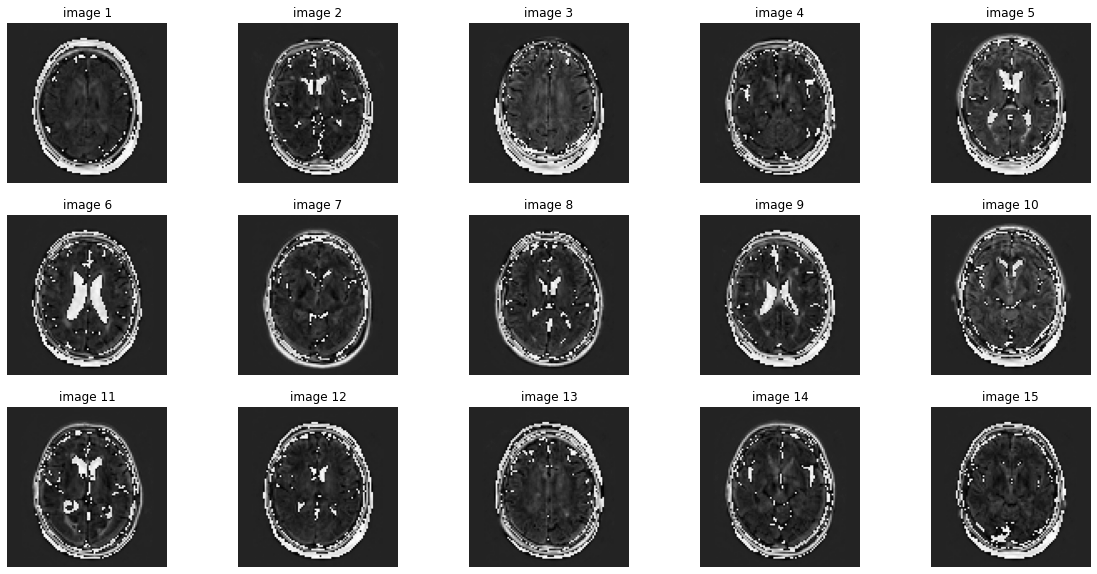

In [ ]:
fig = plt.figure(figsize=(20, 10))
rows = 3
columns = 5
for i in range(15):
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(reconst2[i,:].reshape((96,96)).astype("uint8"),cmap = 'gray')
  plt.axis('off')
  plt.title("image "+str(i+1))
plt.show()

#### Advantages & Disadvantages

***Some of the advantages are:***

*   It can counteract the issues of a high-dimensional data set, such as 
overfitting and computational cost.


*   It can remove correlated features and reduce noise in the data.


*   It can speed up other machine learning algorithms by using fewer features.


*   It can improve visualization by transforming high-dimensional data into low-dimensional data.


***Some of the disadvantages are:***

*   It requires data normalization before performing PCA, otherwise variables with larger scales would dominate the PCA.


*   It may lose some valuable information if not enough principal components are selected to capture the variance in the data.


*   It may produce difficult to interpret principal components that are 
linear combinations of original features.

*   Low interpretability of principal components. Principal components are linear combinations of the features from the original data, but they are not as easy to interpret. For example, it is difficult to tell which are the most important features in the dataset after computing principal components. 

### Q5

In [ ]:
#Import Libraries
import numpy as np
from PIL import Image, ImageOps
from numpy import asarray
from matplotlib import pyplot as plt
import cv2

In [ ]:
#Load image and convet its type to int
image  = asarray(Image.open('q5.png')).astype('int')

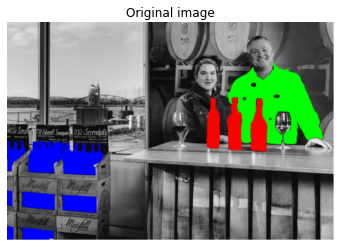

In [ ]:
#Show original image
plt.imshow(image.astype('uint8'))
plt.title('Original image')
plt.axis('off')
plt.show()

In [ ]:
#ّFind mask as every pixels is green in original image
mask = np.zeros((image.shape[0],image.shape[1]))
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    if(image[i][j][1]>=250 and image[i][j][0] ==0 ):
      mask[i][j]=255

In [ ]:
#Show mask as an image
plt.imshow(mask.astype('uint8'),cmap='gray')
plt.axis('off')
plt.savefig('q5res01.jpg')
plt.show()

In [ ]:
# Define erosion function
def erosion(img, kernel):
    # Get image dimensions
    rows, cols = img.shape
    ksize = kernel.shape[0]

    # Create output image
    output = np.zeros_like(img)

    # Get half size of the kernel
    sz = (ksize - 1) // 2
    if(ksize %2 == 0):
      sz = (ksize) // 2

    # Loop over each pixel
    for i in range(rows):
        for j in range(cols):
            # Check if pixel is on boundary
            if i < sz or i >= rows-sz or j < sz or j >= cols-sz:
                # Copy pixel as it is
                output[i,j] = img[i,j]
            else:
                # Get neighborhood by superimposing kernel
                neighborhood = img[i-sz:i+sz+1,j-sz:j+sz+1] * kernel
                
                # Check if all pixels are 255
                if np.all(neighborhood == 255):
                    # Set output pixel to 255
                    output[i,j] = 255
                else:
                    # Set output pixel to 0
                    output[i,j] = 0
    
    # Return output image
    return output

In [ ]:
# Define dilation function
def dilation(img, kernel):
    # Get image dimensions
    rows, cols = img.shape

    # Create output image
    output = np.zeros_like(img)
    ksize = kernel.shape[0]

    # Get half size of the kernel
    sz = (ksize - 1) // 2
    if(ksize %2 == 0):
      sz = (ksize) // 2

    # Loop over each pixel
    for i in range(rows):
        for j in range(cols):
            # Check if pixel is on boundary
            if i < sz or i >= rows-sz or j < sz or j >= cols-sz:
                # Copy pixel as it is
                output[i,j] = img[i,j]
            else:
                # Get neighborhood by superimposing kernel
                neighborhood = img[i-sz:i+sz+1,j-sz:j+sz+1] * kernel
                
                # Check if any pixel is 255
                if np.any(neighborhood == 255):
                    # Set output pixel to 255
                    output[i,j] = 255
                else:
                    # Set output pixel to 0
                    output[i,j] = 0
    # Return output image
    return output

In [ ]:
#Define closing operator
def closing(image , kernel):
  return erosion(dilation(image,kernel),kernel)

In [ ]:
#We choose a kernel based on fill holes ans also keep details
kernel = np.ones((9, 9), np.uint8)
# defining the closing function 
# over the image and structuring element
mask2 = mask.astype(np.uint8)
kernel = kernel.astype(np.uint8)
closing_mask = closing(mask2, kernel)
     
# The mask and closing operation
# is shown in the window 
plt.imshow(closing_mask.astype('uint8'),cmap='gray')
plt.axis('off')
plt.savefig('q5res02.jpg')
plt.show()

In [ ]:
#make the color of clothe red
red_clothe = np.copy(image)
for i in range(closing_mask.shape[0]):
  for j in range(closing_mask.shape[1]):
    if(closing_mask[i][j]==255):
      red_clothe[i,j,1]=0
      red_clothe[i,j,0]=255
      red_clothe[i,j,2]=0

In [ ]:
#Show new image
plt.imshow(red_clothe.astype('uint8'))
plt.axis('off')
plt.savefig('q5res03.jpg')
plt.show()

To find the mask, we find the points whose first channel is zero and whose second channel is 255. If the third channel is 0, the border of the dress is only obtained.


To fill the holes, we use the closing method, which according to the slides covers the empty parts between the full parts of the image. For this, we write functions for Erosion and Dilation, and according to the slides, we first apply Dilation and then apply Erosion on the image.

To apply the mask, find in the image a non-zero value or 255 anywhere in the two-dimensional array of the mask, and set the pixel values in the second and third channels to zero and set them to 255 in the first channel.